In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)

In [4]:
df=pd.read_csv(r'C:\Users\LENOVO\Downloads\United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED (1).csv')

In [5]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


In [6]:
df.tail()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
60055,02/09/2021,TX,2504556,NaN,NaN,13329,2676.0,43306,NaN,NaN,207,0.0,02/11/2021 12:00:00 AM,Not agree,Not agree
60056,11/20/2020,FL,913561,NaN,NaN,8217,1677.0,19014,NaN,NaN,79,5.0,11/20/2020 12:00:00 AM,Not agree,Not agree
60057,08/17/2020,NM,23500,NaN,NaN,92,0.0,682,NaN,NaN,4,0.0,08/19/2020 12:00:00 AM,NaN,Not agree
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0,06/19/2020 12:00:00 AM,Agree,Agree
60059,05/07/2022,MA,1779829,1638144.0,141685.0,0,0.0,20334,19198.0,1136.0,0,0.0,05/09/2022 01:14:40 PM,Agree,Agree


In [7]:
df.shape

(60060, 15)

In [8]:
df.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')

In [9]:
df.dtypes

submission_date     object
state               object
tot_cases            int64
conf_cases         float64
prob_cases         float64
new_case             int64
pnew_case          float64
tot_death            int64
conf_death         float64
prob_death         float64
new_death            int64
pnew_death         float64
created_at          object
consent_cases       object
consent_deaths      object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60060 entries, 0 to 60059
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  60060 non-null  object 
 1   state            60060 non-null  object 
 2   tot_cases        60060 non-null  int64  
 3   conf_cases       34034 non-null  float64
 4   prob_cases       33962 non-null  float64
 5   new_case         60060 non-null  int64  
 6   pnew_case        56534 non-null  float64
 7   tot_death        60060 non-null  int64  
 8   conf_death       33273 non-null  float64
 9   prob_death       33273 non-null  float64
 10  new_death        60060 non-null  int64  
 11  pnew_death       56566 non-null  float64
 12  created_at       60060 non-null  object 
 13  consent_cases    50045 non-null  object 
 14  consent_deaths   51051 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 6.9+ MB


In [11]:
df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases         26026
prob_cases         26098
new_case               0
pnew_case           3526
tot_death              0
conf_death         26787
prob_death         26787
new_death              0
pnew_death          3494
created_at             0
consent_cases      10015
consent_deaths      9009
dtype: int64

In [12]:
df['conf_cases'].value_counts()

0.0          1044
4.0           471
1.0            79
9.0            67
14.0           53
             ... 
1498157.0       1
3308468.0       1
898454.0        1
450186.0        1
24038.0         1
Name: conf_cases, Length: 26174, dtype: int64

In [13]:
df['conf_cases'].describe()

count    3.403400e+04
mean     6.527994e+05
std      1.077693e+06
min      0.000000e+00
25%      6.512275e+04
50%      2.992460e+05
75%      8.426732e+05
max      1.045879e+07
Name: conf_cases, dtype: float64

In [14]:
df['conf_cases'].mode()

0    0.0
Name: conf_cases, dtype: float64

In [15]:
df['conf_cases']=df['conf_cases'].fillna(df['conf_cases'].mode()[0])

In [16]:
df['conf_cases'].isna().any()

False

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60060 entries, 0 to 60059
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  60060 non-null  object 
 1   state            60060 non-null  object 
 2   tot_cases        60060 non-null  int64  
 3   conf_cases       60060 non-null  float64
 4   prob_cases       33962 non-null  float64
 5   new_case         60060 non-null  int64  
 6   pnew_case        56534 non-null  float64
 7   tot_death        60060 non-null  int64  
 8   conf_death       33273 non-null  float64
 9   prob_death       33273 non-null  float64
 10  new_death        60060 non-null  int64  
 11  pnew_death       56566 non-null  float64
 12  created_at       60060 non-null  object 
 13  consent_cases    50045 non-null  object 
 14  consent_deaths   51051 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 6.9+ MB


In [18]:
# Dropping missing values

df.dropna(inplace=True)

In [19]:
df.isna().any()

submission_date    False
state              False
tot_cases          False
conf_cases         False
prob_cases         False
new_case           False
pnew_case          False
tot_death          False
conf_death         False
prob_death         False
new_death          False
pnew_death         False
created_at         False
consent_cases      False
consent_deaths     False
dtype: bool

In [20]:
df.shape

(27977, 15)

In [21]:
df.nunique()

submission_date     1001
state                 31
tot_cases          21444
conf_cases         21414
prob_cases         16168
new_case            6069
pnew_case           2460
tot_death          12969
conf_death         12585
prob_death          4326
new_death            408
pnew_death           170
created_at          2143
consent_cases          1
consent_deaths         1
dtype: int64

In [22]:
df.state.value_counts()

AL     1001
MP     1001
ME     1001
VA     1001
DE     1001
FSM    1001
CO     1001
MI      962
NYC     961
NC      960
PR      959
MS      959
KY      956
TN      950
ID      917
OH      917
WY      917
CT      914
WI      913
MT      913
IL      913
OR      913
AZ      913
GA      912
RMI     912
UT      911
MA      820
OK      776
NJ      661
CA      634
NE      407
Name: state, dtype: int64

In [23]:
df.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,2.797700e+04,2.797700e+04,27977.000000,27977.000000,27977.000000,27977.000000,27977.000000,27977.000000,27977.000000,27977.000000
mean,6.998784e+05,5.961391e+05,103739.338099,1749.246881,294.912392,10402.334418,9199.448583,1202.885835,19.457626,2.372020
std,8.503457e+05,7.506521e+05,152734.577584,4051.631016,783.572885,12098.881484,11040.241549,1641.852397,46.617508,24.398251
min,0.000000e+00,0.000000e+00,0.000000,-4803.000000,-6259.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,5.951400e+04,5.210600e+04,31.000000,29.000000,0.000000,1137.000000,1079.000000,0.000000,0.000000,0.000000
50%,3.603210e+05,3.041710e+05,27901.000000,535.000000,33.000000,5154.000000,4686.000000,319.000000,5.000000,0.000000
75%,1.006327e+06,8.695900e+05,148134.000000,1832.000000,262.000000,16556.000000,14287.000000,1983.000000,20.000000,2.000000
max,4.885289e+06,4.640489e+06,763762.000000,125572.000000,18072.000000,71408.000000,71408.000000,7889.000000,1178.000000,1021.000000


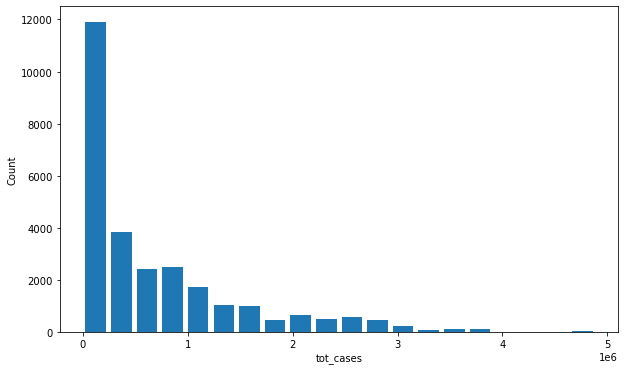

In [24]:
plt.hist(df.tot_cases,bins=20,rwidth=0.8)
plt.xlabel('tot_cases')
plt.ylabel('Count')
plt.show()

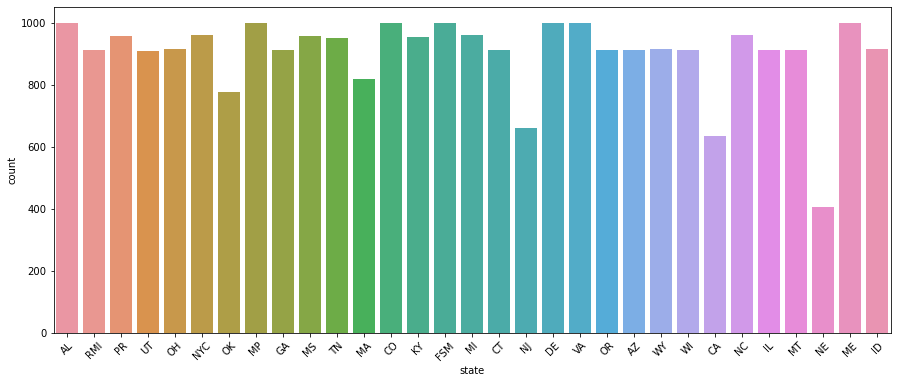

In [25]:
plt.figure(figsize=(15,6))
sns.countplot('state',data=df)
plt.xticks(rotation=45)
plt.show()

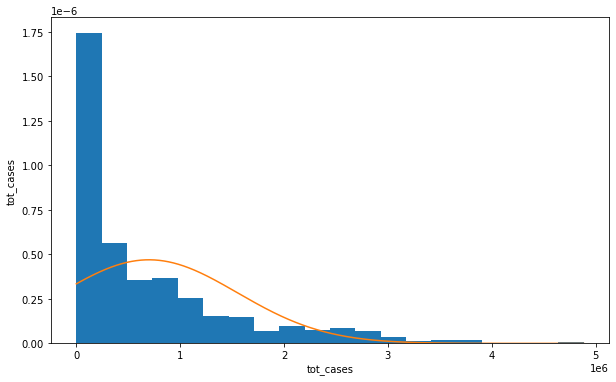

In [26]:
from scipy.stats import norm
import numpy as np

plt.hist(df.tot_cases,bins=20,rwidth=1.0,density=True)
plt.xlabel('tot_cases')
plt.ylabel('tot_cases')

rng=np.arange(df.tot_cases.min(),df.tot_cases.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.tot_cases.mean(),df.tot_cases.std()))

In [27]:
df.tot_cases.mean()

699878.3748078779

In [28]:
df.tot_cases.std()

850345.736828672

In [29]:
# Next step is to detect the outlier and remove using 3 standard deviation 

# One of the ways we can remove outliers is to remove any data points that are beyond 3 standard deviation from mean which means we can come up with
# upper and lower limits .

upper_limit=df.tot_cases.mean() + 3 *df.tot_cases.std()
lower_limit=df.tot_cases.mean() - 3 *df.tot_cases.std()

In [30]:
upper_limit

3250915.585293894

In [31]:
lower_limit

-1851158.8356781383

In [32]:
# Now we select from the sample dataset where outliers are beyond 3 std dev from the mean 


df[(df.tot_cases>upper_limit) | (df.tot_cases<lower_limit)] 

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
15557,08/03/2022,IL,3584009,3584009.0,0.0,5018,0.0,38923,34388.0,4535.0,34,9.0,08/04/2022 01:13:57 PM,Agree,Agree
15562,02/25/2021,CA,3460326,3460326.0,0.0,4965,0.0,50648,50648.0,0.0,1178,0.0,02/27/2021 12:00:00 AM,Agree,Agree
15573,02/10/2021,CA,3362981,3362981.0,0.0,8390,0.0,44425,44425.0,0.0,520,0.0,02/12/2021 12:00:00 AM,Agree,Agree
15649,02/26/2021,CA,3465726,3465726.0,0.0,5400,0.0,51121,51121.0,0.0,473,0.0,02/28/2021 12:00:00 AM,Agree,Agree
15698,06/28/2021,CA,3714051,3714051.0,0.0,1256,0.0,62994,62994.0,0.0,4,0.0,06/30/2021 12:00:00 AM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44275,05/17/2021,CA,3665904,3665904.0,0.0,995,0.0,61510,61510.0,0.0,11,0.0,05/19/2021 12:00:00 AM,Agree,Agree
44304,05/16/2021,CA,3664909,3664909.0,0.0,1370,0.0,61499,61499.0,0.0,55,0.0,05/18/2021 12:00:00 AM,Agree,Agree
44326,06/04/2021,CA,3687736,3687736.0,0.0,1047,0.0,62179,62179.0,0.0,87,0.0,06/06/2021 12:00:00 AM,Agree,Agree
44350,07/12/2021,CA,3889528,3733743.0,155785.0,8910,0.0,63472,63472.0,0.0,96,0.0,07/14/2021 12:00:00 AM,Agree,Agree


In [33]:
# above are the outliers in your dataset 

# Now lets remove them

df_no_outlier=df[(df.tot_cases<upper_limit) & (df.tot_cases>lower_limit)] # this will include data points which are not outliers 

In [34]:
df_no_outlier.shape

# Above shows original datafrase has 27977 records. Out of which 419 were outliers and were removed from the dataset. 

(27558, 15)

In [35]:
# Approach 2- Outlier detection and removal using Z-score 

# Z score is a way to achive the same thing that we did above.
# Z score indicates how many standard deviations away a data point is 


df['zscore']=(df.tot_cases-df.tot_cases.mean()) / df.tot_cases.std() # x-Mu/sigma
df


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,zscore
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree,0.166500
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,Agree,Agree,-0.823052
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,09/04/2021 12:00:00 AM,Agree,Agree,-0.618468
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0,01/03/2022 01:55:55 PM,Agree,Agree,-0.073954
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0,04/04/2021 01:43:43 PM,Agree,Agree,0.381177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60044,09/04/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0,09/05/2022 01:29:13 PM,Agree,Agree,0.250687
60046,02/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,02/20/2020 12:00:00 AM,Agree,Agree,-0.823052
60048,09/25/2021,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0,09/27/2021 01:21:43 PM,Agree,Agree,-0.823047
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0,06/19/2020 12:00:00 AM,Agree,Agree,-0.794565


In [36]:
# get data points that has a z score higher than 3 or lower than 3

df[df['zscore']>3]

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,zscore
15557,08/03/2022,IL,3584009,3584009.0,0.0,5018,0.0,38923,34388.0,4535.0,34,9.0,08/04/2022 01:13:57 PM,Agree,Agree,3.391715
15562,02/25/2021,CA,3460326,3460326.0,0.0,4965,0.0,50648,50648.0,0.0,1178,0.0,02/27/2021 12:00:00 AM,Agree,Agree,3.246265
15573,02/10/2021,CA,3362981,3362981.0,0.0,8390,0.0,44425,44425.0,0.0,520,0.0,02/12/2021 12:00:00 AM,Agree,Agree,3.131788
15649,02/26/2021,CA,3465726,3465726.0,0.0,5400,0.0,51121,51121.0,0.0,473,0.0,02/28/2021 12:00:00 AM,Agree,Agree,3.252615
15698,06/28/2021,CA,3714051,3714051.0,0.0,1256,0.0,62994,62994.0,0.0,4,0.0,06/30/2021 12:00:00 AM,Agree,Agree,3.544644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44275,05/17/2021,CA,3665904,3665904.0,0.0,995,0.0,61510,61510.0,0.0,11,0.0,05/19/2021 12:00:00 AM,Agree,Agree,3.488023
44304,05/16/2021,CA,3664909,3664909.0,0.0,1370,0.0,61499,61499.0,0.0,55,0.0,05/18/2021 12:00:00 AM,Agree,Agree,3.486853
44326,06/04/2021,CA,3687736,3687736.0,0.0,1047,0.0,62179,62179.0,0.0,87,0.0,06/06/2021 12:00:00 AM,Agree,Agree,3.513697
44350,07/12/2021,CA,3889528,3733743.0,155785.0,8910,0.0,63472,63472.0,0.0,96,0.0,07/14/2021 12:00:00 AM,Agree,Agree,3.751003


In [37]:
df[df['zscore']<-3]

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,zscore


In [38]:
df_no_outlier=df[(df.zscore>-3) & (df.zscore<3)]

In [39]:
df_no_outlier.shape

(27558, 16)

<AxesSubplot:xlabel='tot_cases', ylabel='Density'>

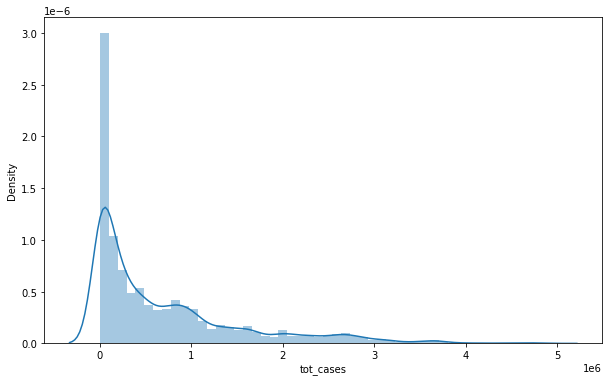

In [40]:
# univariannt analysis:


sns.distplot(df['tot_cases'])

<AxesSubplot:xlabel='state', ylabel='count'>

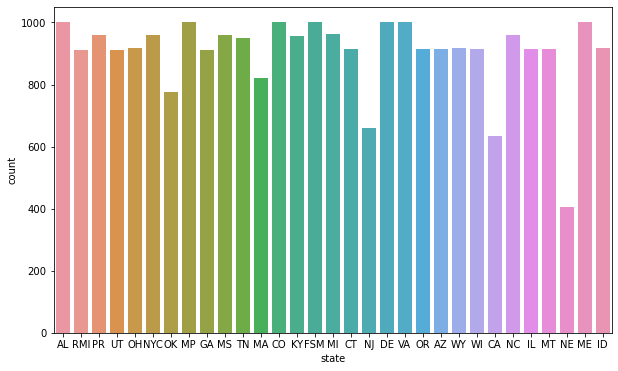

In [41]:
sns.countplot(x='state',data=df)

<AxesSubplot:xlabel='state', ylabel='conf_cases'>

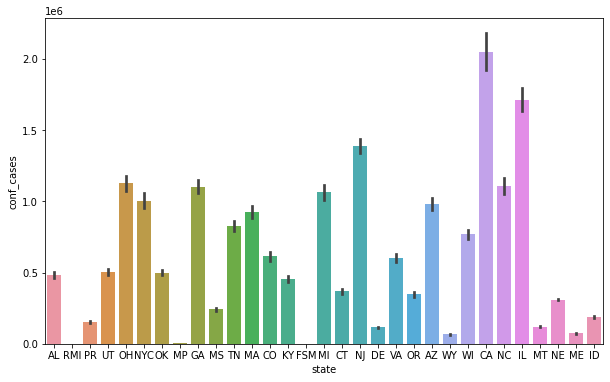

In [42]:
# bivariant analysis:

sns.barplot(x='state',y='conf_cases',data=df)

<AxesSubplot:xlabel='state', ylabel='conf_cases'>

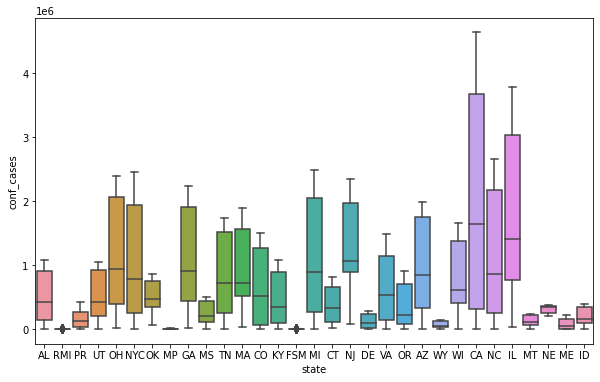

In [43]:
sns.boxplot(x='state',y='conf_cases',data=df)

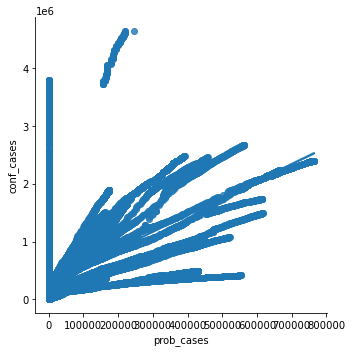

In [44]:
# Regression Plot
# This plot is best suited to visualize the relationship betweenn two numeric data variables.

sns.lmplot(x='prob_cases',y='conf_cases',data=df)


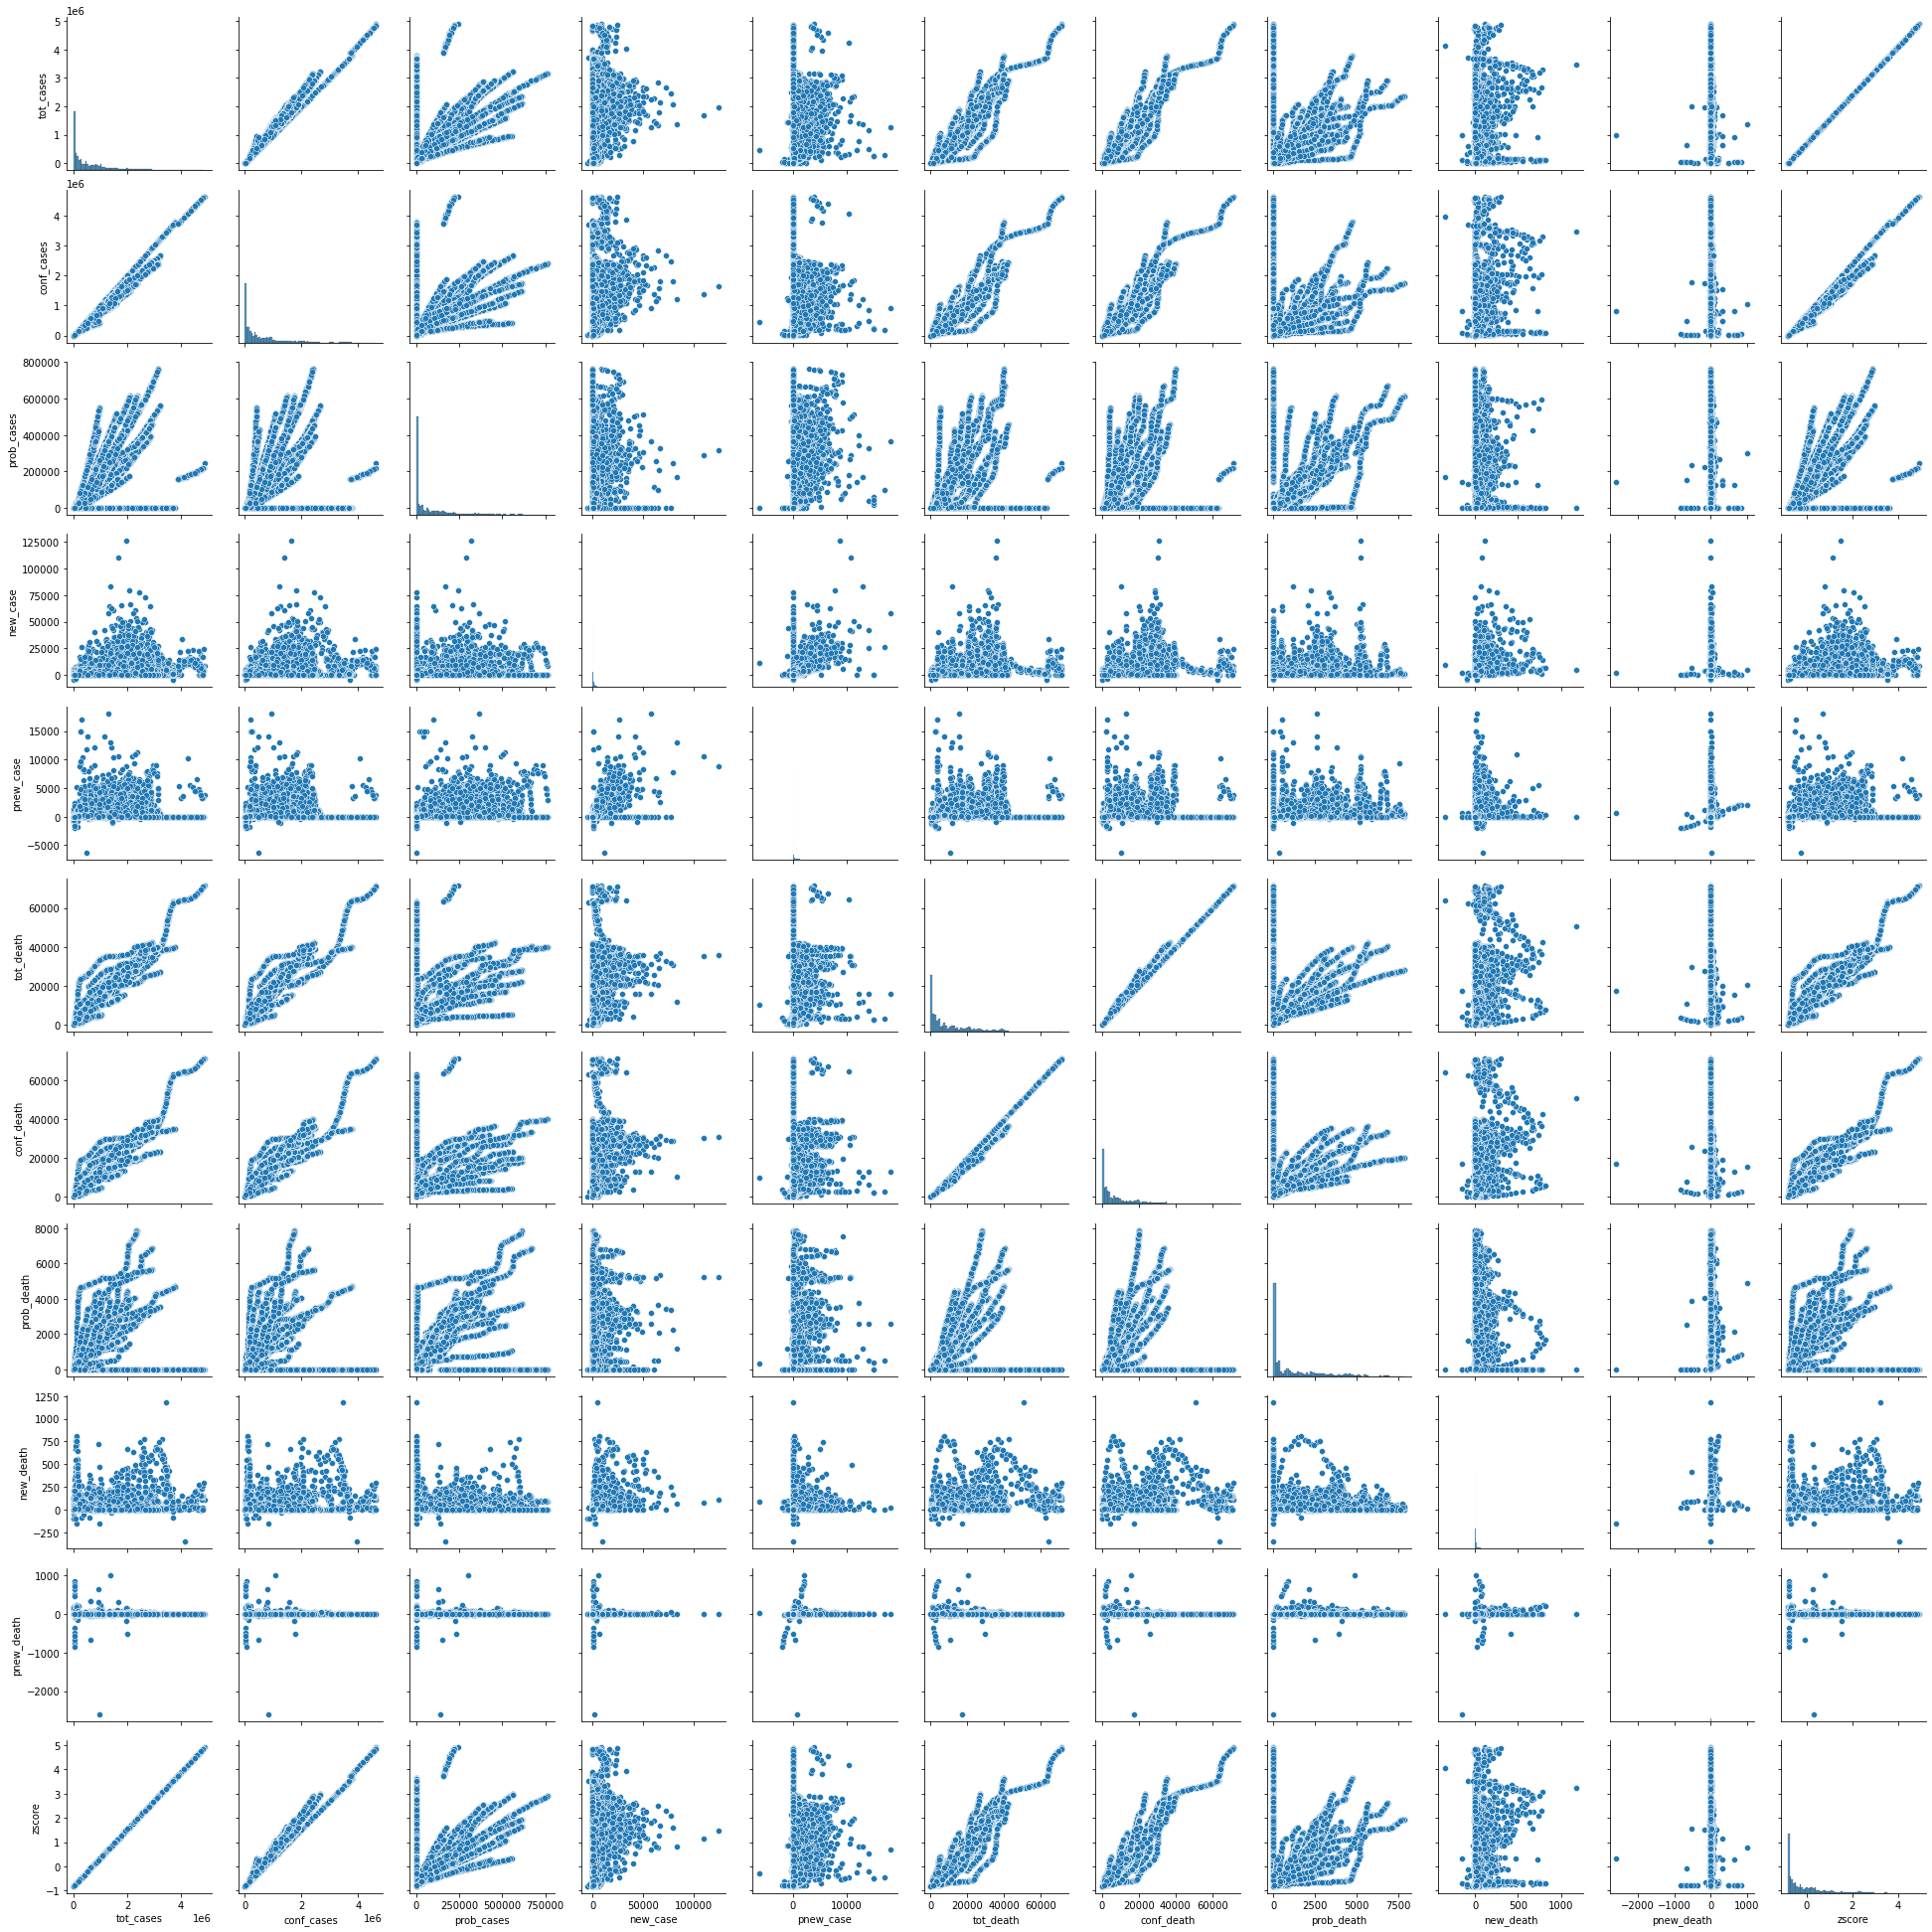

In [45]:
# Multivariant analysis 
# This gives us a statistical analysis of many different variables at once.

sns.pairplot(df)

In [46]:
# t-test is used when we want to test the relationship between two numeric variables. 

# For example, we like to test no of new_death are recorded and no of new-cases are registered and be predicted with the values.

df['new_death'].unique()

array([   7,    0,    8,   20,   73,    3,   22,  152,    2,    4,   44,
          1,    6,  140,    9,   94,   11,  105,   25,    5,   10,   23,
         67,   19,   24,   36,   42,   64,   14,   39,   38,  217,   28,
         37,  742,   13,   70,  132,   17,   16,  154,   57,   46,   49,
         48,   50,   18,   26,   91,   52,   12,   59,   29,   41,  176,
        156,   92,   63,   21,   61,   31,   -1,   79,   40,   15,  125,
         89,   62,   34,   80,  664,  207,   53,   81,   84,   33,   35,
         69,   51,   30,   65,   87,  136,   -2,  767,   55,   27,   45,
         77,  104,   58,  -14,  289,   32,  147,  224,  106,  107,   43,
         68,  103,  139,  146,  680,   56,  114,   95,   72,   83,  192,
        187,  126,  108,  183,   54,  121,   93,  801,   47,   66,  197,
         71,   98,  296,   88,  130,  720,  208,  113,  172,  153,   85,
        163,  110,  150,  466,  131,  158,  205,  304,  411,   60,   74,
         -6,  135,  211,  123,  223,   86,  177,  3

In [47]:
df['new_case'].unique()

array([ 703,    0,  667, ..., 3421, 4422, 9581], dtype=int64)

In [48]:
# we need to categorize the dataset ('new_case') & ('new_death') no of new_cases are registered and no of new_death are recorded...



new_cases_p=df[df['new_death']==1]['new_case']   # conditional statement 
new_cases_n=df[df['new_death']==0]['new_case']

In [49]:
new_cases_n

5           0
10          0
12       2293
21          0
23          0
         ... 
60025       0
60044       0
60046       0
60048       0
60059       0
Name: new_case, Length: 9417, dtype: int64

In [50]:
# step 1 :

# H0- There is no relationship 
# H1- There is a relationship 

from scipy.stats import ttest_ind

obj=ttest_ind(new_cases_p,new_cases_n)    ## significance value - 0.05 

print(obj.pvalue)

# Conclusion- Since the p value is  greater than the threshold, we can say that we reject H1 and accept H0 

7.922951660699306e-05


In [51]:
# If we want to test more than 2 sample groups, we will use ANOVA.

# df['state'].unique()
# df['tot_cases'].unique()


# Problem 
# Example, using the feature 'state' for the prediction of 'tot_cases'

# three groups:

state_0=df[df['state']==0]['tot_cases']
state_1=df[df['state']==1]['tot_cases']
state_2=df[df['state']==2]['tot_cases']


# Step 1
# H0- There is no relationship between the 3 groups
# H1- There is relationship between the 3 groups

from scipy.stats import f_oneway

obj=f_oneway(state_0,state_1,state_2)
print(obj.pvalue)

nan


In [52]:
# Chi-Squared test - is for testing the relationship between two categorical variables. The underlying principal is that
# two categorical variables are independent. 

# In this example test, we will validate whether tot_cases and new_death are independent. 

# Step 1
# H0- tot_cases and new_death are independent to each other
# H1- tot_cases and new_death are dependent to each other 

combine=pd.crosstab(df['tot_cases'],df['new_death'])

In [53]:
combine

new_death,-352,-157,-154,-100,-96,-91,-90,-85,-59,-39,...,744,746,752,755,767,774,779,801,814,1178
tot_cases,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4826113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4850676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from scipy.stats import chi2_contingency

result=chi2_contingency(combine)

print(result[1])


# Conclusion:-
# In this test, we can reject the null hypothesis and that these variables are dependent. 
# This also indicates that tot_cases are strong predictor of new_death. 
# Accept H1 and reject H0 

# Conclusion- Since the p value is  smaller than the threshold, we can say that we reject H0 and accept H1 

0.0


In [55]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,zscore
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree,0.166500
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,Agree,Agree,-0.823052
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,09/04/2021 12:00:00 AM,Agree,Agree,-0.618468
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0,01/03/2022 01:55:55 PM,Agree,Agree,-0.073954
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0,04/04/2021 01:43:43 PM,Agree,Agree,0.381177


In [56]:
## Feature engineering process

# Derive new features from submission_date

df['Date']=df['submission_date'].str.split('/').str[0]
df['Month']=df['submission_date'].str.split('/').str[1]
df['Year']=df['submission_date'].str.split('/').str[2]

In [57]:
df.dtypes

submission_date     object
state               object
tot_cases            int64
conf_cases         float64
prob_cases         float64
new_case             int64
pnew_case          float64
tot_death            int64
conf_death         float64
prob_death         float64
new_death            int64
pnew_death         float64
created_at          object
consent_cases       object
consent_deaths      object
zscore             float64
Date                object
Month               object
Year                object
dtype: object

In [58]:
# convert string type to integer type 

df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27977 entries, 3 to 60059
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  27977 non-null  object 
 1   state            27977 non-null  object 
 2   tot_cases        27977 non-null  int64  
 3   conf_cases       27977 non-null  float64
 4   prob_cases       27977 non-null  float64
 5   new_case         27977 non-null  int64  
 6   pnew_case        27977 non-null  float64
 7   tot_death        27977 non-null  int64  
 8   conf_death       27977 non-null  float64
 9   prob_death       27977 non-null  float64
 10  new_death        27977 non-null  int64  
 11  pnew_death       27977 non-null  float64
 12  created_at       27977 non-null  object 
 13  consent_cases    27977 non-null  object 
 14  consent_deaths   27977 non-null  object 
 15  zscore           27977 non-null  float64
 16  Date             27977 non-null  int32  
 17  Month       

In [60]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,zscore,Date,Month,Year
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree,0.166500,11,22,2021
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,Agree,Agree,-0.823052,5,17,2020
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,09/04/2021 12:00:00 AM,Agree,Agree,-0.618468,9,4,2021
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0,01/03/2022 01:55:55 PM,Agree,Agree,-0.073954,1,1,2022
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0,04/04/2021 01:43:43 PM,Agree,Agree,0.381177,4,3,2021


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27977 entries, 3 to 60059
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  27977 non-null  object 
 1   state            27977 non-null  object 
 2   tot_cases        27977 non-null  int64  
 3   conf_cases       27977 non-null  float64
 4   prob_cases       27977 non-null  float64
 5   new_case         27977 non-null  int64  
 6   pnew_case        27977 non-null  float64
 7   tot_death        27977 non-null  int64  
 8   conf_death       27977 non-null  float64
 9   prob_death       27977 non-null  float64
 10  new_death        27977 non-null  int64  
 11  pnew_death       27977 non-null  float64
 12  created_at       27977 non-null  object 
 13  consent_cases    27977 non-null  object 
 14  consent_deaths   27977 non-null  object 
 15  zscore           27977 non-null  float64
 16  Date             27977 non-null  int32  
 17  Month       

In [79]:
# QUERY 1- Plot top 5 state has new_death records


state_idex=df.new_death.value_counts().index

([<matplotlib.patches.Wedge at 0x20d1f6c9850>,
 [Text(1.1, 0.0, '0'),
  Text(1.0461621663333946, 0.3399186987098808, '1'),
  Text(0.33991867422268784, 1.0461621742897658, '2'),
  Text(-1.0461621902025062, 0.3399186252483017, '3'),
  Text(0.3399188211458418, -1.0461621265515308, '4')],
 [Text(0.6, 0.0, '0.00%'),
  Text(0.5706339089091244, 0.1854101992962986, '10.00%'),
  Text(0.1854101859396479, 0.5706339132489631, '20.00%'),
  Text(-0.5706339219286397, 0.18541015922634638, '30.00%'),
  Text(0.18541026607955005, -0.5706338872099259, '40.00%')])

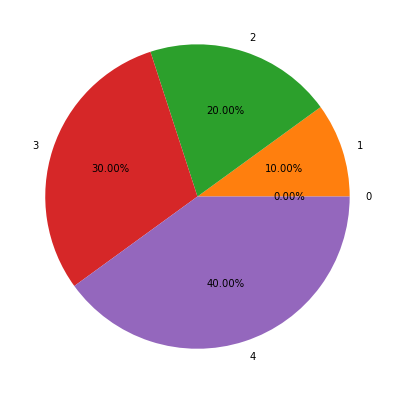

In [80]:
plt.figure(figsize=(10,7))

plt.pie(state_idex[:5],labels=state_idex[:5],autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x20d1f719f70>,
 [Text(1.1, 0.0, '0'),
  Text(1.0925621934054306, 0.12770220648491118, '2'),
  Text(-0.6568744034486823, 0.8823355473366908, '34'),
  Text(-0.4936792051682575, -0.982995850644568, '1'),
  Text(0.6044597507918875, -0.9190366748245737, '17')],
 [Text(0.6, 0.0, '0.00%'),
  Text(0.5959430145847803, 0.06965574899176973, '3.70%'),
  Text(-0.3582951291538267, 0.48127393491092224, '62.96%'),
  Text(-0.2692795664554131, -0.536179554897037, '1.85%'),
  Text(0.3297053186137568, -0.5012927317224948, '31.48%')])

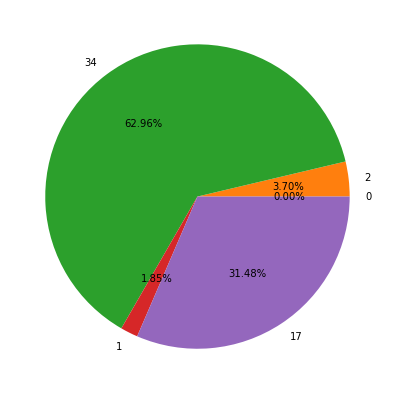

In [81]:
# QUERY 2- Plot top 5 total death  records :

tot_death_index=df.tot_death.value_counts().index
plt.figure(figsize=(10,7))

plt.pie(tot_death_index[:5],labels=tot_death_index[:5],autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x20d19abc760>,
 [Text(1.1, 0.0, '0'),
  Text(1.0939740842771233, 0.11498131556922482, '1'),
  Text(1.0048999936326264, 0.44741032933667013, '2'),
  Text(0.6465637441936395, 0.8899187180267095, '3'),
  Text(-0.8899186423571203, -0.6465638483438895, '24')],
 [Text(0.6, 0.0, '0.00%'),
  Text(0.5967131368784309, 0.06271708121957717, '3.33%'),
  Text(0.5481272692541598, 0.24404199782000185, '6.67%'),
  Text(0.3526711331965306, 0.48541020983275057, '10.00%'),
  Text(-0.48541016855842917, -0.35267119000575786, '80.00%')])

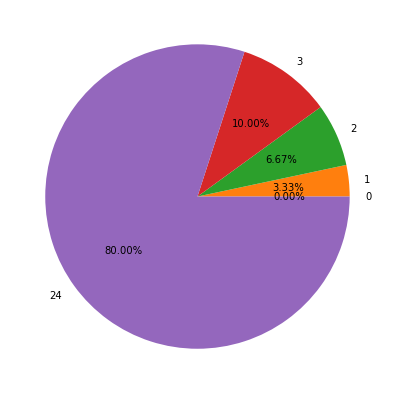

In [84]:
# QUERY 3- Plot top 5 new case records :

new_case_index=df.new_case.value_counts().index

plt.figure(figsize=(10,7))

plt.pie(new_case_index[:5],labels=new_case_index[:5],autopct="%1.2f%%")

<AxesSubplot:xlabel='state', ylabel='new_case'>

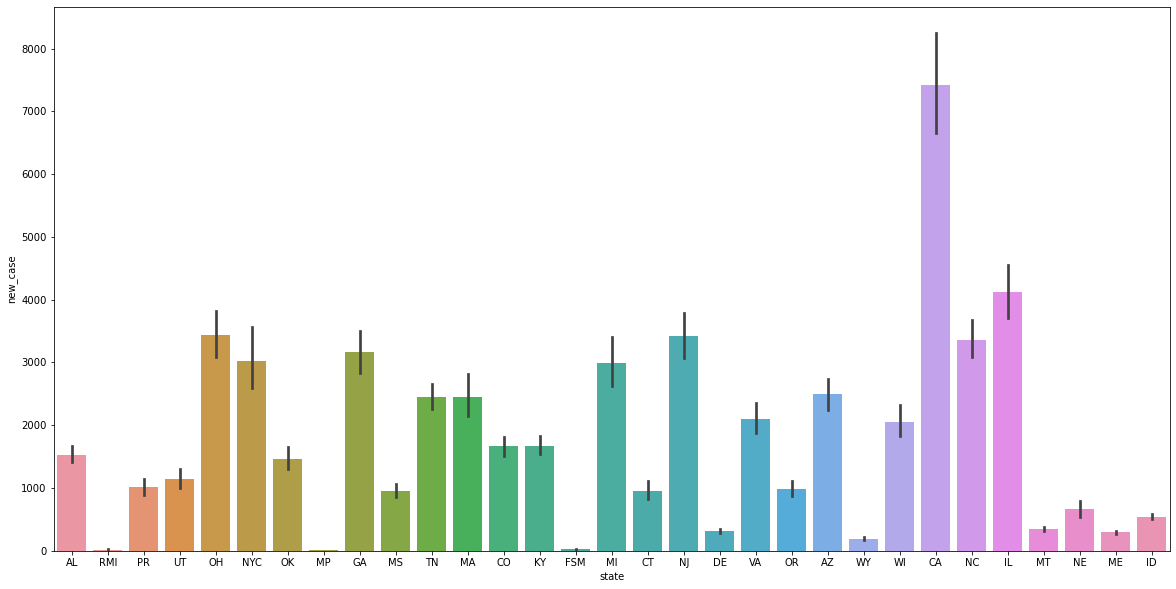

In [85]:
# QUERY 4- Which country near sea has highest population?

plt.figure(figsize=(20,10))
sns.barplot(x='state',y='new_case',data=df)

In [93]:
# Query 6 - 

# Which state has maximum and minnimum tot_cases? 

# maximum case:

df.groupby(['state','tot_cases']).size().reset_index().tail(1)

,state,tot_cases,0
21884,WY,178032,1


In [94]:
# minimum case:

df.groupby(['state','tot_cases']).size().reset_index().head(1)

,state,tot_cases,0
0,AL,0,49


In [95]:
# Query 7 

# Which state has maximum and minimum tot_death?

df.groupby(['state','tot_death']).size().reset_index().tail(1) # maximum  total_death


,state,tot_death,0
18539,WY,1906,1


In [96]:
df.groupby(['state','tot_death']).size().reset_index().head(1) # lowest

,state,tot_death,0
0,AL,0,36


<AxesSubplot:>

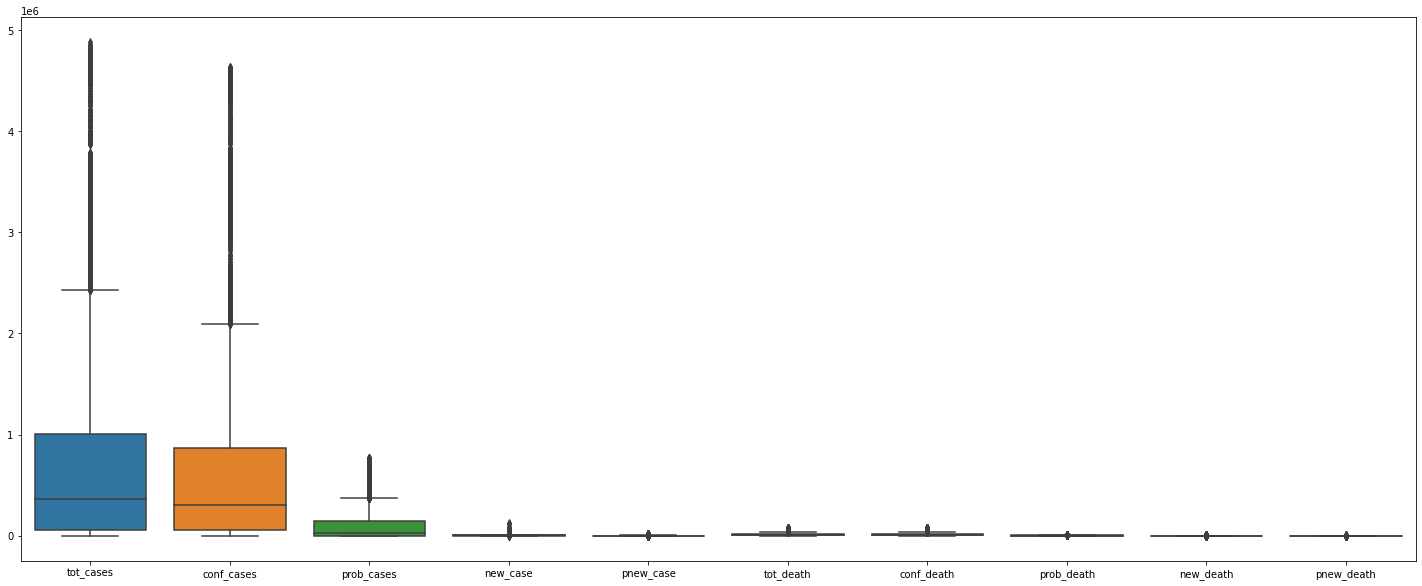

In [97]:
# Boxplot to find outliers in the features
import matplotlib
matplotlib.rcParams['figure.figsize']=(25,10)
sns.boxplot(data=df)

<AxesSubplot:xlabel='prob_death', ylabel='tot_cases'>

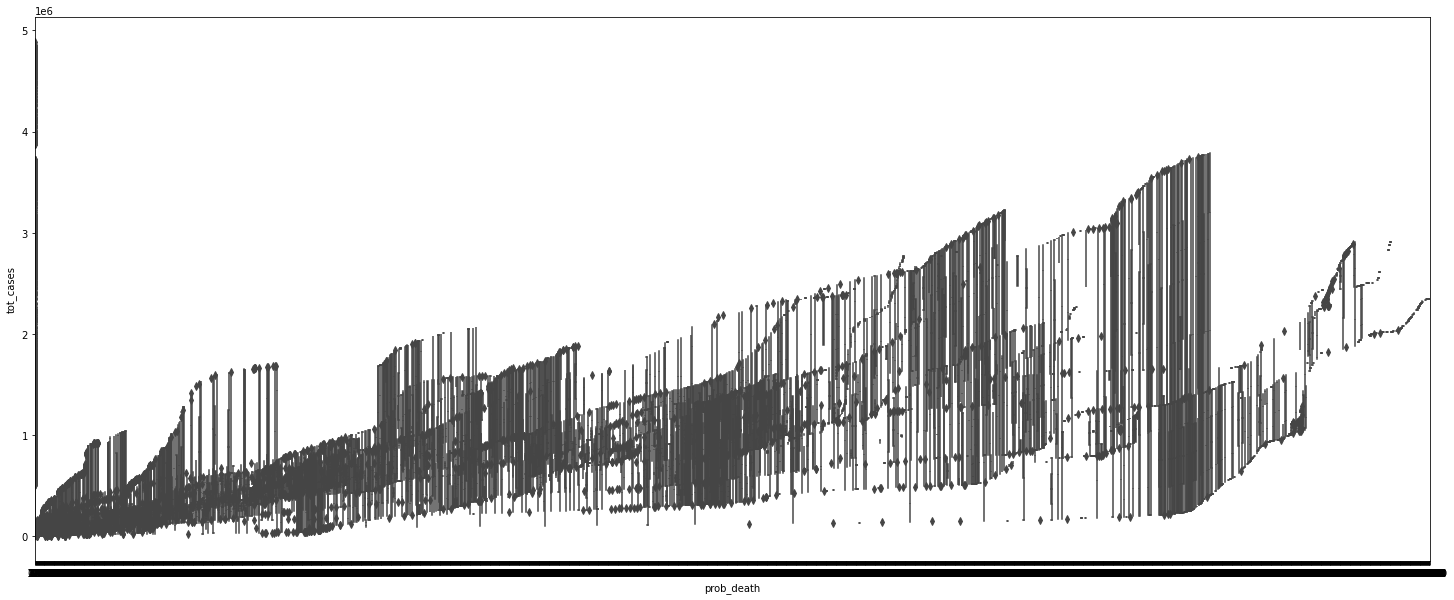

In [98]:
# Boxplot for prob_death Vs tot_cases  :

sns.boxplot(x='prob_death',y='tot_cases',data=df)

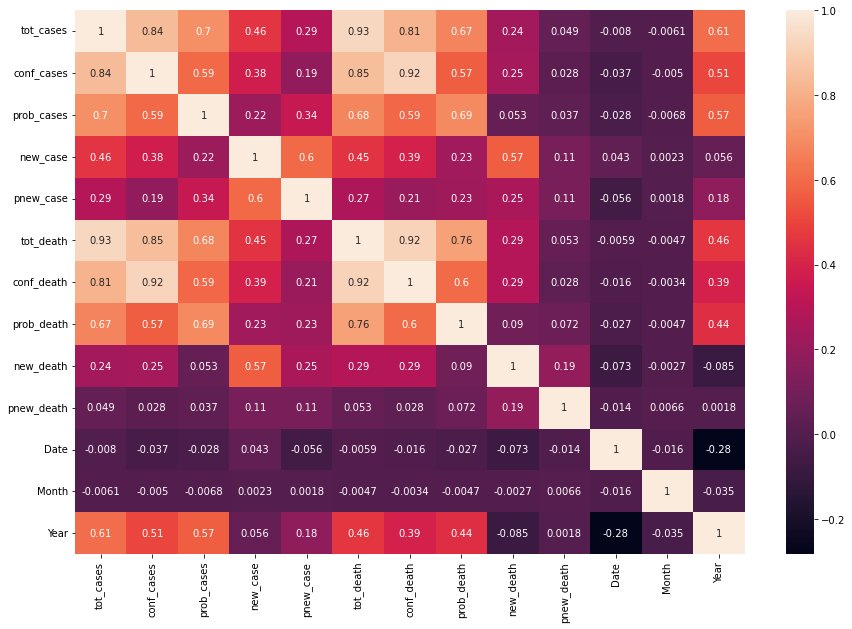

In [44]:
# Heatmap :


plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()